## 1. Importa bibliotecas e módulos necessários

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer

## 2. Carrega a base de dados

In [2]:
# Carrega a base de dados
data = pd.read_csv('./_data/dataset_2021-5-26-10-14.csv', sep='\t', encoding='utf-8', na_values='missing')

In [3]:
# Permite a exibição de todas as colunas da base de dados
pd.set_option('display.max_columns', None)

# Exibe as primeiras linhas da base de dados
data.head()

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.00,0.0,242100.70,0,0.0,0,0.0,0.0,0.0,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.674938,6,2019,0
1,1,16.052632,7.500000,224132.85,0.0,4960846.21,0,0.0,0,0.0,0.0,0.0,0,0,sociedade empresaria limitada,NaN,com de equipamentos de informatica,30/60/90,7134.489373,10,2018,0
2,0,13.250000,3.904762,513043.83,0.0,158631.93,1,1800.0,0,0.0,0.0,0.0,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,NaN,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.64,0.0,669644.16,0,0.0,0,0.0,0.0,0.0,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,NaN,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.00,0.0,2010.56,0,0.0,0,0.0,0.0,0.0,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.505663,10,2017,0


## 3. Análise exploratória de dados

In [4]:
# Exibe as dimensões da base de dados
print(f'A base de dados possui {data.shape[0]:,} linhas e {data.shape[1]} colunas.'.replace(',', '.'))

A base de dados possui 117.273 linhas e 22 colunas.


In [5]:
# Exibe um sumário da base de dados
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117273 entries, 0 to 117272
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   default_3months              117273 non-null  int64  
 1   ioi_36months                 117273 non-null  float64
 2   ioi_3months                  117273 non-null  float64
 3   valor_por_vencer             117273 non-null  float64
 4   valor_vencido                117273 non-null  float64
 5   valor_quitado                117273 non-null  float64
 6   quant_protestos              117273 non-null  int64  
 7   valor_protestos              117273 non-null  float64
 8   quant_acao_judicial          117273 non-null  int64  
 9   acao_judicial_valor          117273 non-null  float64
 10  participacao_falencia_valor  117273 non-null  float64
 11  dividas_vencidas_valor       117273 non-null  float64
 12  dividas_vencidas_qtd         117273 non-null  int64  
 13 

## 3.1 Procura por dados faltantes ou duplicados

In [6]:
# Procura por amostras duplicadas na base de dados
data.duplicated().sum()

0

In [7]:
# Calcula a quantidade de valores faltantes por coluna
missing_values = data.isna().sum()

# Calcula a proporção de valores faltantes
missing_ratio = missing_values / data.shape[0]

# Exibe somente as proporções das colunas que possuem valores faltantes
print(missing_ratio[missing_ratio != 0])

tipo_sociedade         0.005184
opcao_tributaria       0.156259
atividade_principal    0.005048
forma_pagamento        0.276935
dtype: float64


> 1. Há valores faltantes nas variáveis `tipo_sociedade`, `opcao_tributaria`, `atividade_principal` e `forma_pagamento` - todas categóricas;    
> 2. Nenhuma dessas variáveis possui dados faltantes acima do limiar convencionado de 30% e, portanto, serão tratadas conforme as técnicas usuais;
> 3. A base de dados não apresenta amostras duplicadas.

## 3.2 Distribuição da variável alvo

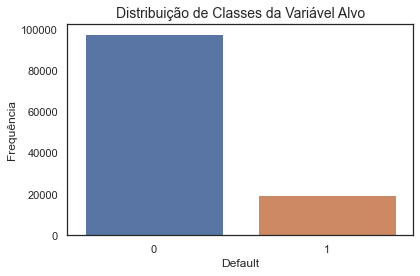

In [8]:
sns.set(style='white')
sns.countplot(x='default', data=data)
plt.ylabel('Frequência')
plt.xlabel('Default')
plt.title('Distribuição de Classes da Variável Alvo', fontsize=14)

# sns.despine()
plt.tight_layout();

> A distribuição de classes da variável alvo (`default`) se encontra bastante desbalanceada.   
> Assim, deverão ser utilizadas técnicas de balanceamento de classes.

## 3.3 Medidas de resumo

In [9]:
# Exibe algumas medidas de resumo
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
default_3months,117273.00,0.15,0.85,0.00,0.00,0.00,0.00,26.00
ioi_36months,117273.00,55.58,60.99,1.00,20.17,38.00,69.75,951.00
ioi_3months,117273.00,17.11,10.99,1.00,11.12,16.00,18.25,90.00
valor_por_vencer,117273.00,64213.84,525254.63,0.00,565.74,4451.74,20062.96,72197586.36
valor_vencido,117273.00,2454.04,80933.13,0.00,0.00,0.00,0.00,13150500.00
valor_quitado,117273.00,1085557.34,7444825.41,0.00,19442.50,81348.78,332264.30,460320322.80
quant_protestos,117273.00,0.24,10.71,0.00,0.00,0.00,0.00,2324.00
valor_protestos,117273.00,2051.02,88317.58,0.00,0.00,0.00,0.00,16305457.00
quant_acao_judicial,117273.00,0.02,0.53,0.00,0.00,0.00,0.00,80.00
acao_judicial_valor,117273.00,921.85,48610.25,0.00,0.00,0.00,0.00,8390986.00


> 1. Por padrão são apresentadas estatísticas somente das variáveis numéricas;   
> 2. A variável `participacao_falencia_valor` não possui valores e, portanto, pode ser removida da base de dados;
> 3. A variável `valor_total_pedido` possui pelo menos um valor negativo, podendo indicar um _outlier_ - erro de digitação, estorno;
> 4. Alguns modelos de aprendizado de máquina pressupõem distribuição normal dos dados. Pode-se observar que a maioria das _features_ não possuem tal distribuição; com valores apenas acima do terceiro quartil e desvio padrão próximo de zero - indicando que a contribuição delas em um modelo preditito pode ser baixa, ou mesmo nenhuma.

In [10]:
# Remove a feature "participacao_falencia_valor" da base de dados
data.drop('participacao_falencia_valor', axis='columns', inplace=True)

## 3.4 Análise de correlação

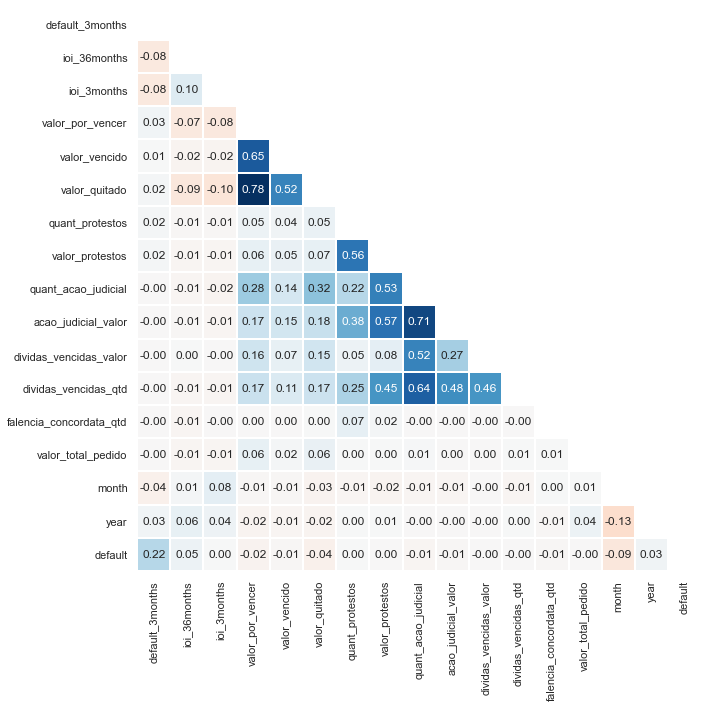

In [11]:
plt.figure(figsize=[10, 10])

sns.heatmap(data.corr(), 
            cmap='RdBu', 
            center=0, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            cbar=False, 
            mask = np.triu(np.ones_like(data.corr(), dtype=bool)))
plt.tight_layout()

> De acordo com o gráfico acima, a base de dados não apresenta variáveis altamente correlacionadas.

## 3.5 Análise das variáveis numéricas

## 3.5.1 Quantidade de _default_ nos últimos 3 meses

In [12]:
data['default_3months'].describe()

count    117273.000000
mean          0.148721
std           0.853794
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: default_3months, dtype: float64

In [13]:
# Exibe os valores únicos da variável
print(data['default_3months'].unique())

[ 0  1  2  3  4  6  5  7  9 11 17 25 21 10 14 12 18  8 15 23 13 26 19 22
 20 16]


In [14]:
# Atribui a descrição 'houve default' para valores maiores que 0 (zero)
# Caso contrário, atribui 'não houve default'.
default_3months_over0 = (data['default_3months'] > 0).map({True: 'houve default', 
                                                          False: 'não houve default'})

# Agrupa a base de dados de acordo com o critério acima criado, 
# agregando a contagem de valores para a variável alvo 
default_3months_bin = data.groupby(default_3months_over0)['default'].agg(['value_counts'])
default_3months_bin = default_3months_bin.reset_index()

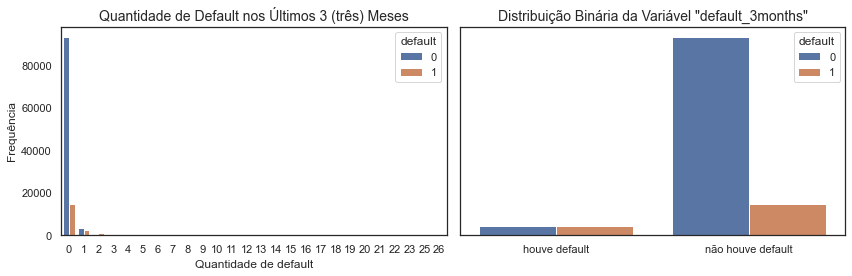

In [15]:
fig, ax = plt.subplots(1, 2, figsize=[12, 4], sharey=True)

sns.countplot(x='default_3months', hue='default', data=data, ax=ax[0])
ax[0].set(xlabel='Quantidade de default', ylabel='Frequência') 
ax[0].set_title('Quantidade de Default nos Últimos 3 (três) Meses', fontsize=14) 

sns.barplot(x='default_3months', y='value_counts', hue='default', data=default_3months_bin, ax=ax[1])
ax[1].set(xlabel=None, ylabel=None) 
ax[1].set_title('Distribuição Binária da Variável "default_3months"', fontsize=14) 

plt.tight_layout()

> Pela distribuição da variável `default_3months`, em princípio não irá agregar ao modelo preditivo.   
> Podemos, contudo, transformá-la em uma variável binária e avaliar se há, assim, alguma influência no modelo.

## 3.5.2 Intervalo médio entre pedidos (em dias) nos últimos meses

In [16]:
# Exibe algumas medidas-resumo
data[['ioi_36months', 'ioi_3months']].describe().T

,count,mean,std,min,25%,50%,75%,max
ioi_36months,117273.0,55.582906,60.989240,1.0,20.166667,38.0,69.75000,951.0
ioi_3months,117273.0,17.106291,10.993605,1.0,11.121543,16.0,18.24885,90.0


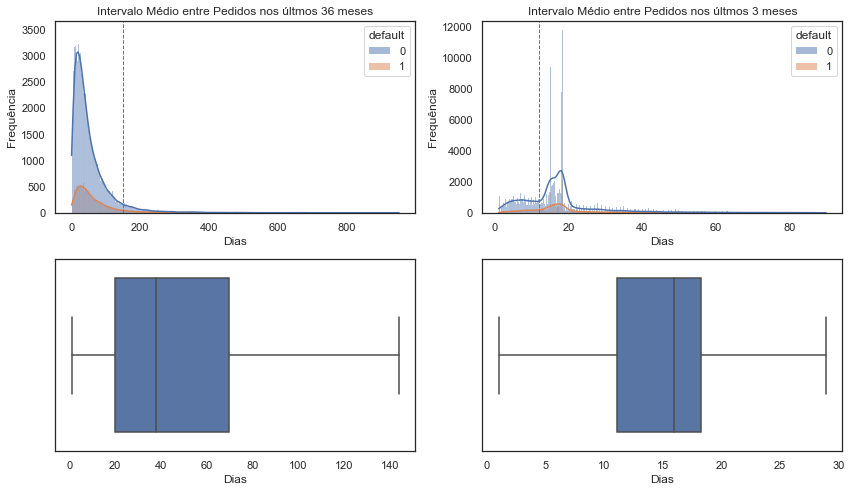

In [17]:
fig, ax = plt.subplots(2, 2, figsize=[12, 7])

sns.histplot(x='ioi_36months', hue='default', data=data, kde=True, ax=ax[0, 0])
ax[0, 0].set(xlabel='Dias', ylabel='Frequência', 
             title='Intervalo Médio entre Pedidos nos últmos 36 meses')
ax[0, 0].axvline(150, c='r', linestyle='--', linewidth='1')

sns.boxplot(x='ioi_36months', data=data, ax=ax[1, 0], showfliers=False) # sem outliers
ax[1, 0].set(xlabel='Dias', title=None)

sns.histplot(x='ioi_3months', hue='default', data=data, kde=True, ax=ax[0, 1])
ax[0, 1].set(xlabel='Dias', 
             ylabel='Frequência', title='Intervalo Médio entre Pedidos nos últmos 3 meses')
ax[0, 1].axvline(12, c='r', linestyle='--', linewidth='1')

sns.boxplot(x='ioi_3months', hue='default', data=data, showfliers=False, ax=ax[1, 1]) # sem outliers
ax[1, 1].set(xlabel='Dias', title=None)
plt.tight_layout();

> Em relação à variável `ioi_36months`, em um período de 3 (três) anos, a maioria dos pedidos foi realizada em até 200 dias.   
> No período de três meses (`ioi_3months`) esse intervalo entre os pedidos se dá entre 12 e 20 dias.   
> Pode ser feita uma transformação logarítimica para alterar a distriuição da variável `ioi_36months`.   
> As distribuições em relação aos atributos de classe para essas variáveis são bastante semelhantes, não contribuindo assim para modelos lineares.   
> Obs.: Para que fosse possível uma boa visualização dos _boxplots_, foram removidos os _outliers_.   

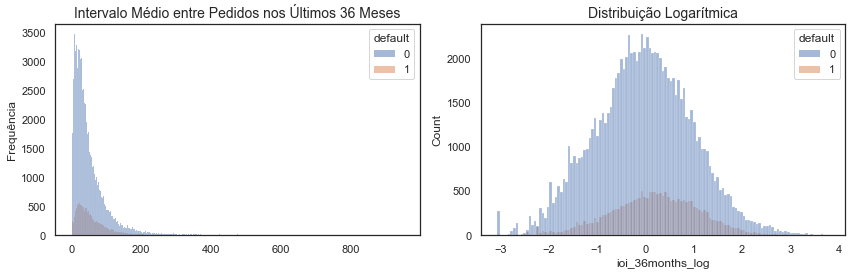

In [18]:
# Transformação logarítmica para a distribuição da variável "ioi_36months"
pt = PowerTransformer(method='yeo-johnson', standardize=True)
data['ioi_36months_log'] = pt.fit_transform(data[['ioi_36months']])

fig, ax = plt.subplots(1, 2, figsize=[12, 4])

sns.histplot(x='ioi_36months', hue='default', data=data, ax=ax[0])
ax[0].set(xlabel='Dias', ylabel='Frequência')
ax[0].set_title('Intervalo Médio entre Pedidos nos Últimos 36 Meses', fontsize=14)

sns.histplot(x='ioi_36months_log', hue='default', data=data, ax=ax[1])
ax[0].set(xlabel=None, ylabel='Frequência')
ax[1].set_title('Distribuição Logarítmica', fontsize=14)
plt.tight_layout();

## 3.5.3 Valores por vencer, vencidos e quitados

In [19]:
# Exibe algumas medidas Estatísticas
with pd.option_context('display.float_format', '{:_.4f}'.format):
    display(data[['valor_por_vencer', 'valor_vencido', 'valor_quitado']].describe().T)

,count,mean,std,min,25%,50%,75%,max
valor_por_vencer,117_273.0000,64_213.8377,525_254.6257,0.0000,565.7400,4_451.7400,20_062.9600,72_197_586.3600
valor_vencido,117_273.0000,2_454.0426,80_933.1251,0.0000,0.0000,0.0000,0.0000,13_150_500.0000
valor_quitado,117_273.0000,1_085_557.3362,7_444_825.4139,0.0000,19_442.5000,81_348.7800,332_264.3000,460_320_322.8000


In [20]:
# Transforma a variável "valor_vencido" em binária
valor_vencido_over0 = (data['valor_vencido'] > 0).map({True: 'há valor vencido', 
                                                      False: 'não há valor vencido'})

valor_vencido_bin = data.groupby(valor_vencido_over0)['default'].agg(['value_counts'])
valor_vencido_bin = valor_vencido_bin.reset_index()

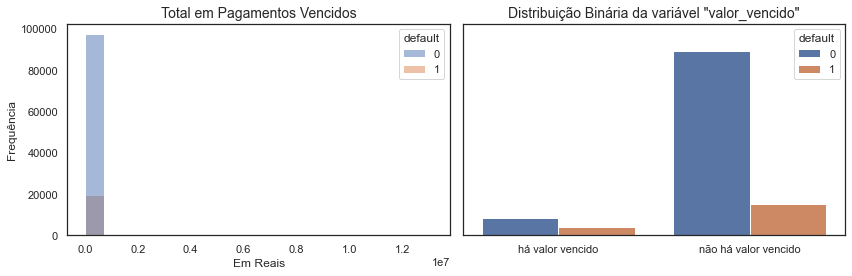

In [21]:
fig, ax = plt.subplots(1, 2, figsize=[12, 4], sharey=True)

sns.histplot(x='valor_vencido', hue='default', data=data, ax=ax[0])
ax[0].set(xlabel='Em Reais', ylabel='Frequência')
ax[0].set_title('Total em Pagamentos Vencidos', fontsize=14) 

sns.barplot(x='valor_vencido', y='value_counts', hue='default', data=valor_vencido_bin)
ax[1].set(xlabel=None, ylabel=None) 
ax[1].set_title('Distribuição Binária da variável "valor_vencido"', fontsize=14)

plt.tight_layout()

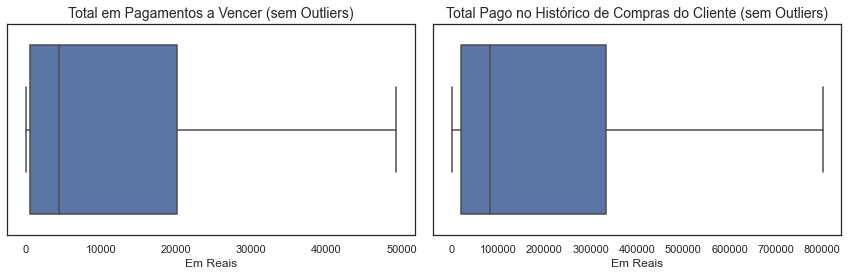

In [22]:
fig, ax = plt.subplots(1, 2, figsize=[12, 4]) 

sns.boxplot(x='valor_por_vencer', data=data, showfliers=False, ax=ax[0]) # sem outliers
ax[0].set_title('Total em Pagamentos a Vencer (sem Outliers)', fontsize=14)
ax[0].set_xlabel('Em Reais')

sns.boxplot(x='valor_quitado', data=data, showfliers=False, ax=ax[1]) # sem outliers
ax[1].set_title('Total Pago no Histórico de Compras do Cliente (sem Outliers)', fontsize=14)
ax[1].set_xlabel('Em Reais')

plt.tight_layout();

> Removidos os outliers das variáveis `valor_por_vencer` e `valor_quitado`, percebe-se que o comportamento das distribuições dessas variáveis são semelhantes.

## 3.5.4 Variáveis relacionadas ao Serasa

* `quant_protestos`	Quantidade de protestos de títulos de pagamento apresentados no Serasa
* `valor_protestos`	Valor total (em Reais) dos protestos de títulos de pagamento apresentados no Serasa
* `quant_acao_judicial` Quantidade de ações judiciais apresentadas pelo Serasa
* `acao_judicial_valor`	Valor total das ações judiciais (Serasa)
* `participacao_falencia_valor`	Valor total (em Reais) de falências apresentadas pelo Serasa
* `dividas_vencidas_valor` Valor total de dívidas vencidas (Serasa)
* `dividas_vencidas_qtd` Quantidade total de dívidas vencidas (Serasa)
* `falencia_concordata_qtd` Quantidade de concordatas (Serasa)

In [23]:
serasa = ['quant_protestos', 'valor_protestos', 'quant_acao_judicial', 'acao_judicial_valor', 
          'dividas_vencidas_valor', 'dividas_vencidas_qtd', 'falencia_concordata_qtd']

data[serasa].describe().T

,count,mean,std,min,25%,50%,75%,max
quant_protestos,117273.0,0.240456,10.707825,0.0,0.0,0.0,0.0,2324.0
valor_protestos,117273.0,2051.017146,88317.579444,0.0,0.0,0.0,0.0,16305457.0
quant_acao_judicial,117273.0,0.018922,0.534034,0.0,0.0,0.0,0.0,80.0
acao_judicial_valor,117273.0,921.851051,48610.251973,0.0,0.0,0.0,0.0,8390986.0
dividas_vencidas_valor,117273.0,560.380836,84592.906849,0.0,0.0,0.0,0.0,19722514.0
dividas_vencidas_qtd,117273.0,0.014974,0.397264,0.0,0.0,0.0,0.0,40.0
falencia_concordata_qtd,117273.0,0.000622,0.030759,0.0,0.0,0.0,0.0,2.0


> Todos os dados relacionados ao Serasa possuem o comportamento de _outliers_.   
> E àquelas variáveis com desvio padrão próximo de 0 (zero) possivelmente não irão contribuir para um modelo preditivo.

## 3.5.5 Valor total do pedido

In [24]:
# Exibe algumas Estatísticas
with pd.option_context('display.float_format', '{:_.4f}'.format):
    display(data['valor_total_pedido'].describe())

count       117_273.0000
mean         24_061.8002
std         490_667.9612
min            -744.6899
25%           2_140.4187
50%           4_012.7306
75%           9_645.9227
max     150_333_994.6122
Name: valor_total_pedido, dtype: float64

In [25]:
print(f'A variável "valor_total_pedido" possui {data[data["valor_total_pedido"] < 0].shape[0]} valores negativos.\n', 
      data[data['valor_total_pedido'] < 0]['valor_total_pedido'], sep='\n')

A variável "valor_total_pedido" possui 144 valores negativos.

1971     -221.138653
3481     -211.583351
4198      -76.792684
4850     -105.765170
5791     -168.945774
             ...    
113350   -237.404003
114309   -620.755212
114663   -152.454152
115041    -46.577583
116577   -136.516603
Name: valor_total_pedido, Length: 144, dtype: float64


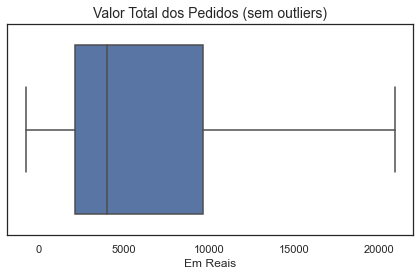

In [26]:
fig, ax = plt.subplots()

sns.boxplot(x='valor_total_pedido', data=data, showfliers=False) # sem outliers
ax.set_title('Valor Total dos Pedidos (sem outliers)', fontsize=14)
ax.set(xlabel='Em Reais')
plt.tight_layout()

> Os pedidos com valores negativos, apesar de poucos, não parecem caracterizar erros de digitação, mas estornos.   
> 50% das amostras dos pedidos realizados possuem valores entre R\$ 2.500,00 e R\$ 10.000,00.   
> Os _outliers identificados_ - valores negativos, ou mesmo o valor máximo na ordem de R\$ 150 milhões - não parecem caracterizar erro.

## 3.5.6 Mês do pedido

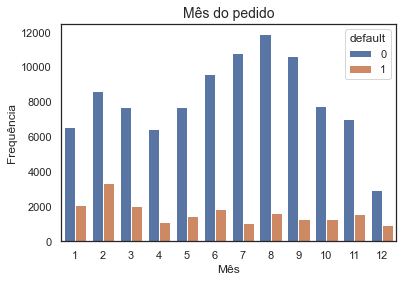

In [27]:
fig, ax = plt.subplots()

sns.countplot(x='month', hue='default', data=data)
ax.set(xlabel='Mês', ylabel='Frequência')
ax.set_title('Mês do pedido', fontsize=14);

In [28]:
# Exibe a proporção da variável _default_ de acordo com o mês
data.groupby('month')['default'].value_counts(normalize=True)

month  default
1      0          0.761172
       1          0.238828
2      0          0.721934
       1          0.278066
3      0          0.789663
       1          0.210337
4      0          0.855641
       1          0.144359
5      0          0.843582
       1          0.156418
6      0          0.837412
       1          0.162588
7      0          0.912090
       1          0.087910
8      0          0.880089
       1          0.119911
9      0          0.891492
       1          0.108508
10     0          0.859823
       1          0.140177
11     0          0.817409
       1          0.182591
12     0          0.758077
       1          0.241923
Name: default, dtype: float64

> Percebe-se um aumento da inadimplência nos primeiros meses do ano, até março; seguido de oscilações, porém de proporções menores.   
> O maior número de _default_ ocorre no mês de fevereiro e o menor, em julho.

## 3.5.6 Ano do pedido

In [29]:
# Exibe a proporção da variável _default_ de acordo com o ano
data.groupby('year')['default'].value_counts(normalize=True)

year  default
2017  0          0.866522
      1          0.133478
2018  0          0.810956
      1          0.189044
2019  0          0.835260
      1          0.164740
Name: default, dtype: float64

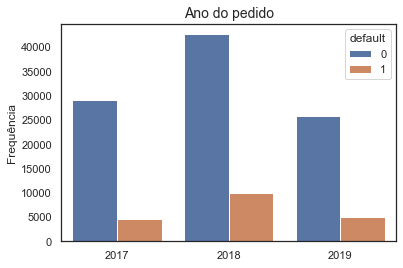

In [30]:
fig, ax = plt.subplots()

sns.countplot(x='year', hue='default', data=data)
ax.set(xlabel=None, ylabel='Frequência')
ax.set_title('Ano do pedido', fontsize=14);

## 3.6 Variáveis categóricas

* `tipo_sociedade`	Tipo de sociedade do cliente B2B
* `opcao_tributaria` Opção tributária do cliente B2B
* `atividade_principal` Atividade principal do cliente B2B
* `forma_pagamento` Forma de pagamento combinada para o pedido

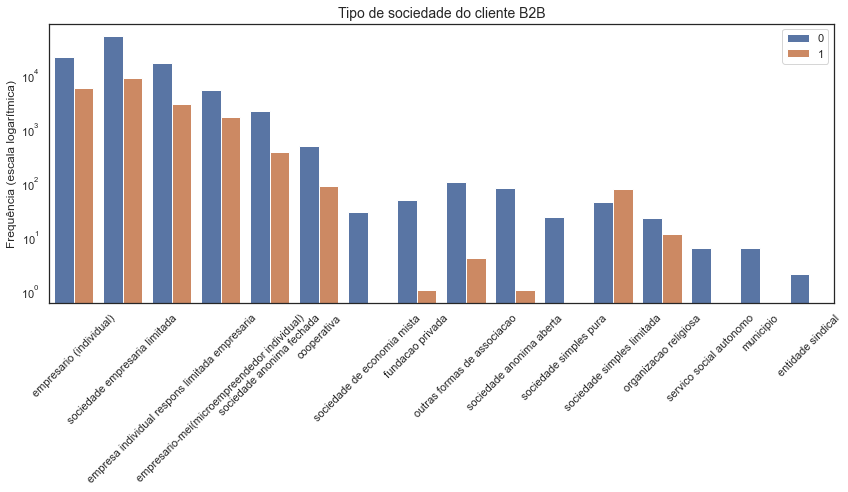

In [31]:
fig, ax = plt.subplots(figsize=[12, 7])

sns.countplot(x='tipo_sociedade', data=data, hue='default')
ax.set_title('Tipo de sociedade do cliente B2B', fontsize=14)
ax.set(xlabel=None, ylabel='Frequência (escala logarítmica)', yscale='log') 
plt.xticks(rotation=45)
plt.legend(loc=1)
plt.tight_layout()

> Algumas classes da variável `tipo_sociedade` - por exemplo: cooperativa, sociedade anomima aberta, entidade sindical - podem ser determinantes para um modelo preditivo.

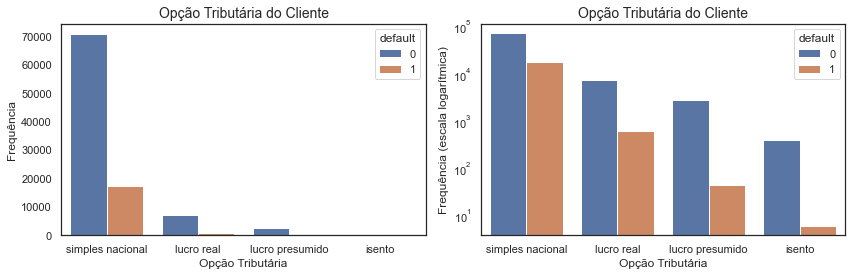

In [32]:
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

sns.countplot(x='opcao_tributaria', data=data, hue='default', ax=ax[0])
ax[0].set(ylabel='Frequência', xlabel='Opção Tributária')
ax[0].set_title('Opção Tributária do Cliente', fontsize=14)

sns.countplot(x='opcao_tributaria', data=data, hue='default', ax=ax[1])
ax[1].set(ylabel='Frequência (escala logarítmica)', yscale='log', xlabel='Opção Tributária')
ax[1].set_title('Opção Tributária do Cliente', fontsize=14)

plt.tight_layout()

In [33]:
print(f'A variável "atividade_principal" possui {data["atividade_principal"].nunique()} classes.\n')
print(f'A variável "forma_pagamento" possui {data["forma_pagamento"].nunique()} classes.\n')

A variável "atividade_principal" possui 203 classes.

A variável "forma_pagamento" possui 104 classes.



> Obs.: Os plots das variáveis `atividade_principal` e `forma_pagamento` não contribuíram para essa análise.